In [115]:
#load all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#set random seed for reproducible results
np.random.seed(42)

In [116]:
df = pd.read_csv("/Users/priyankademla/Desktop/Full time offer search/Interview Prep/datasets/Data_Science_Challenge.csv")

In [117]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [118]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [120]:
df.shape #relatively good coverage - with no null values

(3333, 21)

In [121]:
df['phone number'].nunique() #can use phone number as primary key - every phone number is unique per customer

3333

In [122]:
df['area code'].nunique() #can leave the state value out - to avoid high dimensionality and focus on pre-processing the other categorical variables

3

In [123]:
#creating a dataframe extracting the area code values for each customer - created dummy variables

area_code_dummies = pd.get_dummies(df['area code'])
area_code_dummies = area_code_dummies.add_prefix('area_code')
area_code_dummies

,area_code408,area_code415,area_code510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [124]:
df["international plan"].loc[df['international plan'] == 'no'] = 0
df['international plan'].loc[df['international plan'] == 'yes'] = 1
df['international plan'] = df['international plan'].astype('int64')
df['international plan']

/var/folders/1k/6nqvgzks3yqf5r3lckr3k7q00000gn/T/ipykernel_27391/2761696635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["international plan"].loc[df['international plan'] == 'no'] = 0
/var/folders/1k/6nqvgzks3yqf5r3lckr3k7q00000gn/T/ipykernel_27391/2761696635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['international plan'].loc[df['international plan'] == 'yes'] = 1


0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

In [125]:
df['voice mail plan'].loc[df['voice mail plan']=='yes'] = 1
df['voice mail plan'].loc[df['voice mail plan'] == 'no'] = 0
df['voice mail plan'] = df['voice mail plan'].astype('int64')
df['voice mail plan']

/var/folders/1k/6nqvgzks3yqf5r3lckr3k7q00000gn/T/ipykernel_27391/1080974236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voice mail plan'].loc[df['voice mail plan']=='yes'] = 1
/var/folders/1k/6nqvgzks3yqf5r3lckr3k7q00000gn/T/ipykernel_27391/1080974236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voice mail plan'].loc[df['voice mail plan'] == 'no'] = 0


0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

In [126]:
#creating a final dataset for further analysis

df_final = df.drop(columns = ['area code','state','phone number'])
df_final = pd.concat([df_final,area_code_dummies],axis=1)
df_final

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code408,area_code415,area_code510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,0,0,1


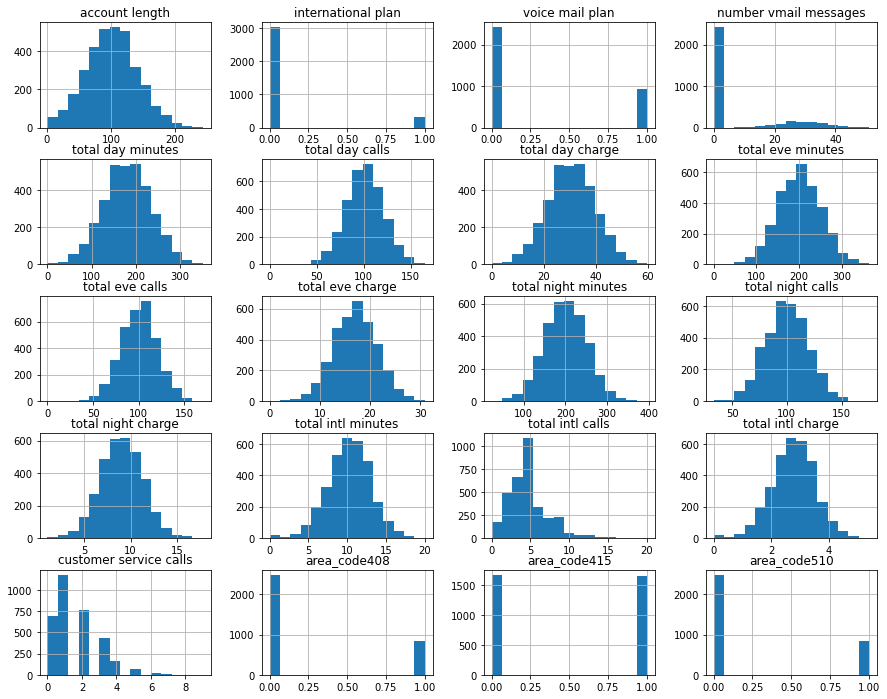

In [127]:
#data exploration insights

#check distribution of values
df_final.hist(figsize=(15,12),bins = 15)
plt.show()

#most customers dont use vmail service and international calling feature
#Half of the customers live in area code 415
#Check for an imbalanced dataset - might pose to be a problem
#the company earns more by total day calls as the total day charge is high

In [128]:
#check classes ratio
df_final.groupby(['churn'])['churn'].count()

churn
False    2850
True      483
Name: churn, dtype: int64

<AxesSubplot:>

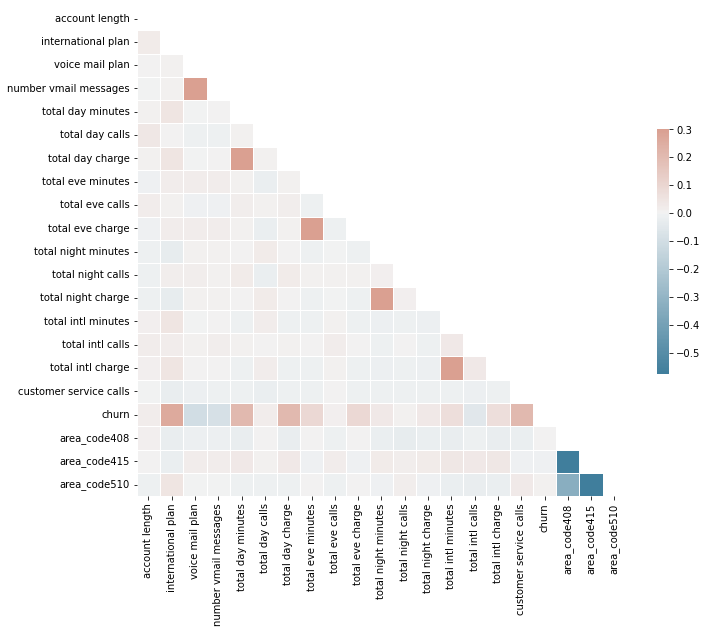

In [129]:
#create a correlation matrix to observe the correlation

corr = df_final.corr()
mask= np.triu(np.ones_like(corr,dtype=bool))

#setup the matplotlib figure
f,ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230,20,as_cmap = True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.3,center=0,square=True,linewidths=0.5,cbar_kws={"shrink": .5})

Findings from correlation matrix:
1. high positive correlation bw number of vmail msgs and voice mailplan
2. positive correlation of churn & total day charge with total day minutes
3. high positive correlation bw churn & international plan
4. positive correlation bw total eve charge with total eve minutes
5. positive correlation bw total night charge with total night minutes
6. positive correlation bw total intl charge with total intl minutes
7. positive correlation bw churn & customer service calls
8. negative correlation bw churn & voice mail plan
9. negative correlation bw churn & number of voice mail msgs
10. negative correlation bw churn & total intl calls

In [130]:
'''check feature importance with random forest classifier'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

le = preprocessing.LabelEncoder()
y = le.fit_transform(df_final['churn'])

In [138]:
#drop the target variable
X = df_final.drop(columns=['churn'])

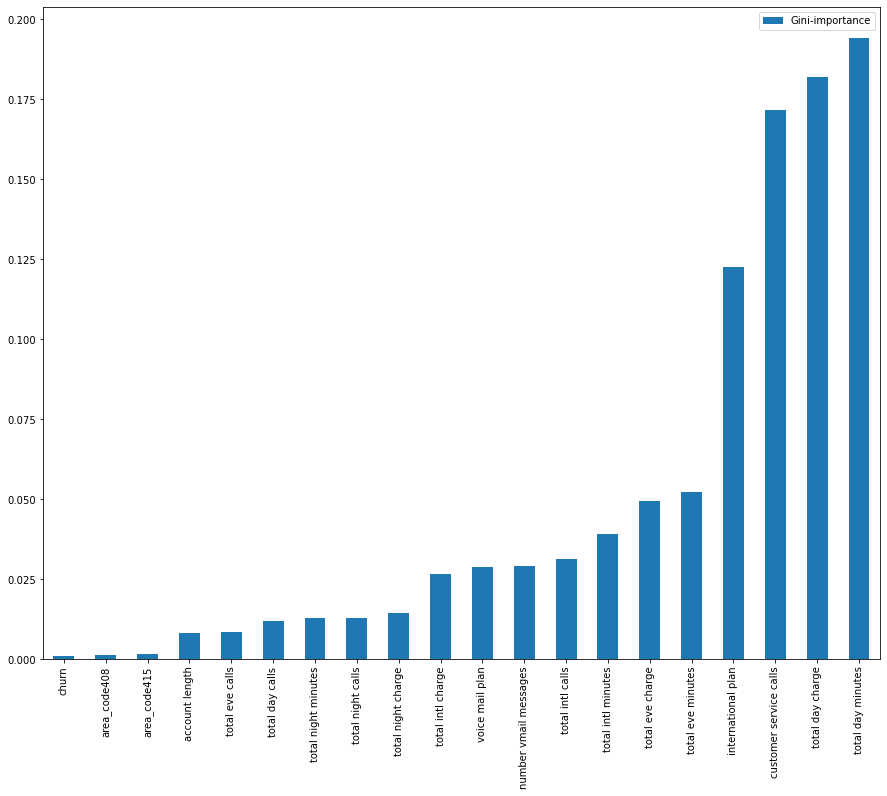

In [139]:
#create the train-test split
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#features selected here were selected in the multicollinearity part
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest =  RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance

for feature, importance in zip(df_final.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

Gini-importance shows us which features would be most useful if we build a tree-based model with given features. According to the analysis above, the most important three features of churn are: total day charge, total day minutes, and customer service calls.

***Predictive Model***

In this notebook, we will mostly apply machine learning methods for the given problem. Therefore, we will prefer to use an 80%-20% split since it is used as the most common ratio in applications (not including Deep Learning). Furthermore, we have an imbalanced dataset in terms of class distributions. We can use stratify option of train_test_split( ) function of sklearn to split data to train and test datasets with the same distribution and be sure that samples of the test or train dataset are not only formed by the majority class.

In [140]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [141]:
import xgboost

In [151]:
import xgboost
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

names = ['Nearest Neighbors',
        'Linear SVM',
        'RBF SVM',
        'Gaussian Process',
        'Decision Tree',
        'Random Forest',
        'Neural Net',
        'Ada Boost',
        'Naive Bayes',
        'QDA',
        'XGBoost',
         'logistic regression'
        ]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel='linear',C=0.025),
    SVC(gamma=2,C=1),
    GaussianProcessClassifier(1.0*RBF(1.0),random_state=42),
    DecisionTreeClassifier(max_depth=5,random_state=42),
    RandomForestClassifier(max_depth=5,random_state=42),
    MLPClassifier(alpha=1,max_iter=1000,random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False,eval_metric='mlogloss',seed=0),
    LogisticRegression(max_iter=1000)
]


As this is a classification task, the most commonly used metric of evaluation would be accuracy here. However, we have an imbalanced dataset here >> F1 score would be a good evaluation metric as it balances out precision & recall so it's a good evaluation metric even for imbalanced datasets! So we will use both accuracy & f1 score to evaluate the performance of the various models!

In [152]:
from sklearn.metrics import f1_score

Model Results

In [153]:
for name, clf in zip(names,classifiers):
    clf.fit(X_train, y_train)
    acc_score = clf.score(X_test,y_test)
    y_pred = clf.predict(X_test)
    f_score = f1_score(y_test,y_pred,average='macro')
    print("accuracy:","{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.89 f1_score: 0.72 Model: Nearest Neighbors
accuracy: 0.85 f1_score: 0.46 Model: Linear SVM
accuracy: 0.85 f1_score: 0.46 Model: RBF SVM
accuracy: 0.93 f1_score: 0.85 Model: Gaussian Process
accuracy: 0.94 f1_score: 0.86 Model: Decision Tree
accuracy: 0.90 f1_score: 0.73 Model: Random Forest
accuracy: 0.93 f1_score: 0.85 Model: Neural Net
accuracy: 0.88 f1_score: 0.70 Model: Ada Boost
accuracy: 0.85 f1_score: 0.70 Model: Naive Bayes
accuracy: 0.87 f1_score: 0.75 Model: QDA
accuracy: 0.96 f1_score: 0.92 Model: XGBoost
accuracy: 0.86 f1_score: 0.60 Model: logistic regression


/Users/priyankademla/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
